In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

import setuptools.dist

from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Embedding, SimpleRNN, LSTM
from keras.utils import pad_sequences

In [8]:
import seaborn as sns

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
train_data = pd.read_csv("train.csv")

In [30]:
test_data = pd.read_csv("test.csv")

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [31]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [4]:
train_data.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [19]:
train_data2 = train_data.copy()

# Nahradenie NaN hodnôt v stĺpci 'keyword' hodnotou 'unknown'
train_data2['keyword'].fillna('unknown', inplace=True)

# Nahradenie NaN hodnôt v stĺpci 'location' hodnotou 'unknown'
train_data2['location'].fillna('unknown', inplace=True)

# Skontroluj, či boli hodnoty správne nahradené
print(train_data2[['keyword', 'location']].isna().sum())

keyword     0
location    0
dtype: int64


In [32]:
test_data2 = test_data.copy()

# Nahradenie NaN hodnôt v stĺpci 'keyword' hodnotou 'unknown'
test_data2['keyword'].fillna('unknown', inplace=True)

# Nahradenie NaN hodnôt v stĺpci 'location' hodnotou 'unknown'
test_data2['location'].fillna('unknown', inplace=True)

# Skontroluj, či boli hodnoty správne nahradené
print(test_data2[['keyword', 'location']].isna().sum())

keyword     0
location    0
dtype: int64


In [23]:
train_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7613 non-null   object
 2   location  7613 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [21]:
train_data2.to_csv('train_data2.csv', index=False)

In [33]:
test_data2.to_csv('test_data2.csv', index=False)

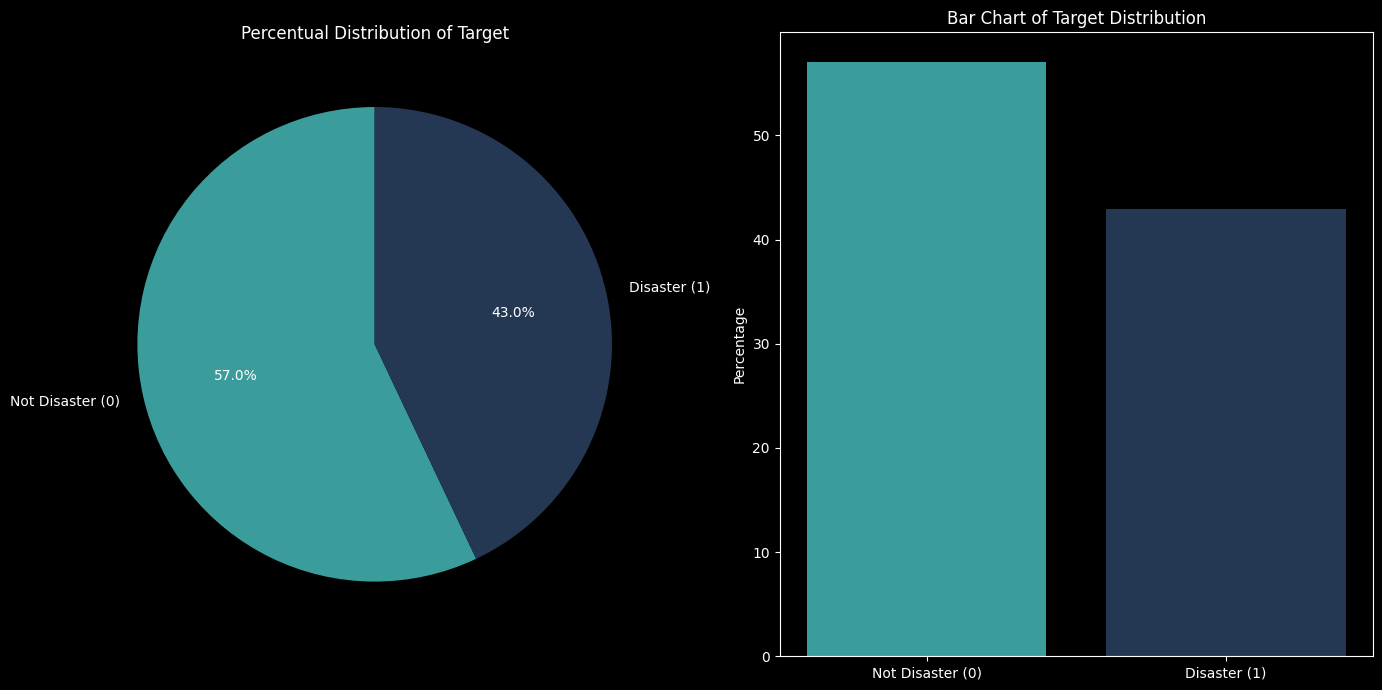

In [22]:
plt.style.use('dark_background')
target_counts = train_data2['target'].value_counts()

# Zobrazenie percentuálneho rozdelenia
percentages = target_counts / target_counts.sum() * 100

# Vytvorenie grafu s 2 podgrafmi (koláčový a stĺpcový)
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Farby pre kategórie
colors = ['#3B9C9C', '#253853']  # Zelene pre "not disaster", červené pre "disaster"

# Koláčový graf
axes[0].pie(percentages, labels=['Not Disaster (0)', 'Disaster (1)'], autopct='%1.1f%%', colors=colors, startangle=90, textprops={'color':'white'})
axes[0].set_title('Percentual Distribution of Target', color='white')

# Stĺpcový graf
axes[1].bar(['Not Disaster (0)', 'Disaster (1)'], percentages, color=colors)
axes[1].set_title('Bar Chart of Target Distribution', color='white')
axes[1].set_ylabel('Percentage', color='white')

# Nastavenie farieb pre osy a text
for ax in axes:
    ax.tick_params(colors='white')  # Farba pre ticks na osiach
    ax.yaxis.label.set_color('white')  # Farba pre názov y-osi
    ax.xaxis.label.set_color('white')  # Farba pre názov x-osi

# Zobrazenie grafov
plt.tight_layout()
plt.show()

In [27]:

def count_keyword_occurrences(text, keyword):
    return text.lower().split().count(keyword.lower())

# Získanie unikátnych kľúčových slov
keywords = train_data2['keyword'].unique()

# Spočítanie výskytov každého kľúčového slova v texte
for keyword in keywords:
    count = train_data2['text'].apply(lambda x: count_keyword_occurrences(x, keyword)).sum()
    print(f'Keyword: {keyword}, Count: {count}')

Keyword: unknown, Count: 3
Keyword: ablaze, Count: 25
Keyword: accident, Count: 64
Keyword: aftershock, Count: 9
Keyword: airplane%20accident, Count: 0
Keyword: ambulance, Count: 37
Keyword: annihilated, Count: 25
Keyword: annihilation, Count: 19
Keyword: apocalypse, Count: 27
Keyword: armageddon, Count: 21
Keyword: army, Count: 71
Keyword: arson, Count: 30
Keyword: arsonist, Count: 17
Keyword: attack, Count: 74
Keyword: attacked, Count: 40
Keyword: avalanche, Count: 16
Keyword: battle, Count: 31
Keyword: bioterror, Count: 29
Keyword: bioterrorism, Count: 18
Keyword: blaze, Count: 17
Keyword: blazing, Count: 28
Keyword: bleeding, Count: 30
Keyword: blew%20up, Count: 0
Keyword: blight, Count: 20
Keyword: blizzard, Count: 17
Keyword: blood, Count: 37
Keyword: bloody, Count: 43
Keyword: blown%20up, Count: 0
Keyword: body%20bag, Count: 0
Keyword: body%20bagging, Count: 0
Keyword: body%20bags, Count: 0
Keyword: bomb, Count: 92
Keyword: bombed, Count: 30
Keyword: bombing, Count: 65
Keyword: 

In [28]:
def count_keyword_occurrences(text, keyword):
    return text.lower().split().count(keyword.lower())

# Získanie unikátnych kľúčových slov
keywords = train_data2['keyword'].unique()

# Vytvorenie prázdneho zoznamu pre uloženie výsledkov
results = []

# Spočítanie výskytov každého kľúčového slova v texte
for keyword in keywords:
    count = train_data2['text'].apply(lambda x: count_keyword_occurrences(x, keyword)).sum()
    results.append({'keyword': keyword, 'count': count})

# Vytvorenie DataFrame pre zoradenie výsledkov
results_df = pd.DataFrame(results)

# Zoradenie podľa počtu výskytov v zostupnom poradí
sorted_results = results_df.sort_values(by='count', ascending=False).reset_index(drop=True)

# Zobrazenie prvých 20 najčastejších kľúčových slov
top_20_keywords = sorted_results.head(20)
print(top_20_keywords)

      keyword  count
0        fire    209
1   emergency    141
2      police    126
3    disaster    122
4     burning    111
5       storm     97
6        bomb     92
7       crash     84
8        dead     81
9      attack     74
10       army     71
11   collapse     68
12    bombing     65
13   accident     64
14      fatal     63
15      death     59
16       fear     53
17   wildfire     51
18     debris     50
19      wreck     48


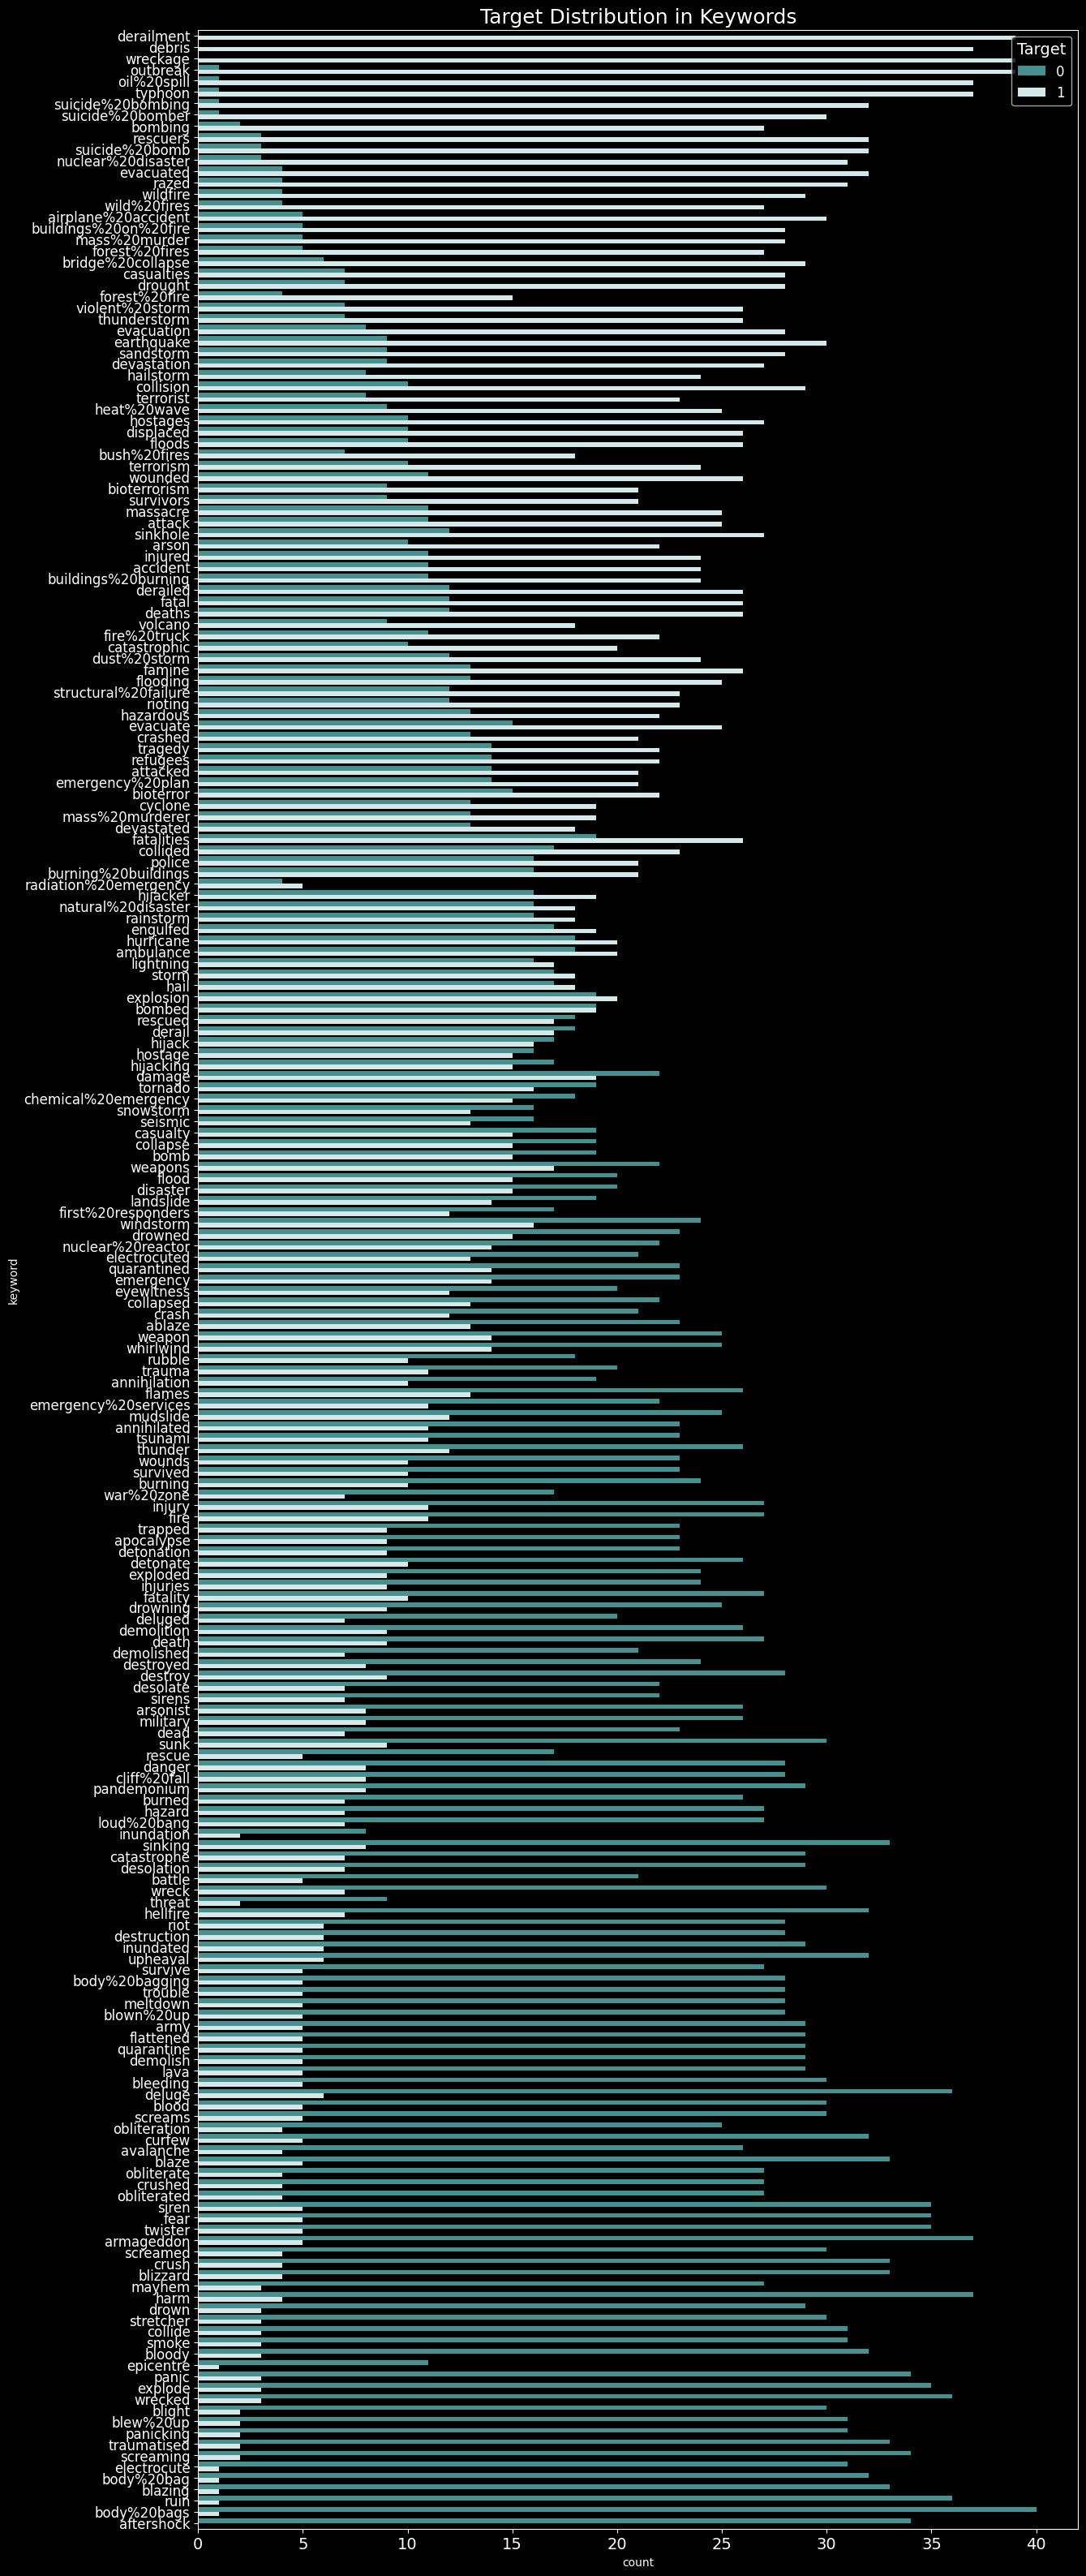

In [29]:
train_data['target_mean'] = train_data.groupby('keyword')['target'].transform('mean')

# Vytvorenie grafu
fig, ax = plt.subplots(figsize=(14, 40), dpi=100)  # Zvýšená šírka a výška grafu pre lepšiu čitateľnosť

# Zoradenie podľa priemerného 'target'
sorted_keywords = train_data.sort_values(by='target_mean', ascending=False)['keyword']

# Vytvorenie countplotu s prispôsobenými farbami
sns.countplot(y=sorted_keywords,
              hue=train_data.sort_values(by='target_mean', ascending=False)['target'],
              ax=ax,
              palette={0: '#3B9C9C', 1: '#CFECEC'})  # Tyrkysovo modrá pre "Not Disaster" a jemná žltá pre "Disaster"

# Nastavenie parametrov grafu
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=12)
ax.legend(loc='upper right', title='Target', title_fontsize='14', fontsize='12')
ax.set_title('Target Distribution in Keywords', fontsize=18)

# Zobrazenie grafu
plt.show()

# Odstránenie dočasného stĺpca 'target_mean'
train_data.drop(columns=['target_mean'], inplace=True)

cleaning

In [65]:
import re

# Funkcia na očistenie textu
def clean_text(text):
    if pd.isna(text):
        return ""
    # Odstránenie URL
    text = re.sub(r'http\S+', '', text)
    # Odstránenie hashtagov
    text = re.sub(r'#\w+', '', text)
    # Odstránenie špeciálnych znakov
    text = re.sub(r'[^\w\s]', '', text)
    # Previesť na malé písmená
    text = text.lower()
    return text

# Funkcia na analýzu sentimentu
def analyze_sentiment(text):
    if pd.isna(text):
        return 'Unknown'
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Predpokladajme, že 'train_data2' je už načítaný DataFrame
# Očistenie textu
train_data2['cleaned_text'] = train_data2['text'].apply(clean_text)

# Analýza sentimentu
train_data2['sentiment'] = train_data2['cleaned_text'].apply(analyze_sentiment)

# Výber potrebných stĺpcov
train_data2_clean = train_data2[['id', 'keyword', 'location', 'cleaned_text', 'target', 'sentiment']]

# Uloženie do CSV súboru
train_data2_clean.to_csv('train_data2_clean.csv', index=False)

# Kontrola uloženého súboru
print(train_data2_clean.head())

   id  keyword location                                       cleaned_text  \
0   1  unknown  unknown  our deeds are the reason of this  may allah fo...   
1   4  unknown  unknown              forest fire near la ronge sask canada   
2   5  unknown  unknown  all residents asked to shelter in place are be...   
3   6  unknown  unknown  13000 people receive  evacuation orders in cal...   
4   7  unknown  unknown  just got sent this photo from ruby  as smoke f...   

   target sentiment  
0       1   Neutral  
1       1  Positive  
2       1  Negative  
3       1   Neutral  
4       1   Neutral  


In [66]:
train_data2_clean.head(10)

,id,keyword,location,cleaned_text,target,sentiment
0,1,unknown,unknown,our deeds are the reason of this may allah fo...,1,Neutral
1,4,unknown,unknown,forest fire near la ronge sask canada,1,Positive
2,5,unknown,unknown,all residents asked to shelter in place are be...,1,Negative
3,6,unknown,unknown,13000 people receive evacuation orders in cal...,1,Neutral
4,7,unknown,unknown,just got sent this photo from ruby as smoke f...,1,Neutral
5,8,unknown,unknown,update california hwy 20 closed in both dire...,1,Negative
6,10,unknown,unknown,heavy rain causes flash flooding of streets ...,1,Negative
7,13,unknown,unknown,im on top of the hill and i can see a fire in ...,1,Positive
8,14,unknown,unknown,theres an emergency evacuation happening now i...,1,Neutral
9,15,unknown,unknown,im afraid that the tornado is coming to our area,1,Negative


EDA text

In [38]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [46]:
from textblob import TextBlob

In [49]:
from sklearn.feature_extraction.text import CountVectorizer

Počet textov: 7613
Priemerná dĺžka textov: 101.1616970970708 znakov


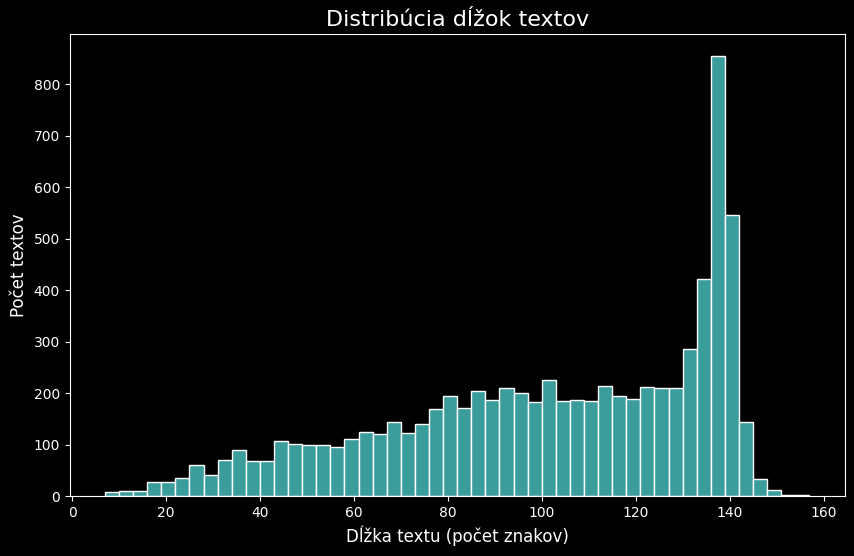

In [71]:
num_texts = len(train_data2)
avg_length = train_data2['text'].apply(len).mean()

print(f"Počet textov: {num_texts}")
print(f"Priemerná dĺžka textov: {avg_length} znakov")

# Vizualizácia priemernej dĺžky textov
plt.figure(figsize=(10, 6), facecolor='black')
plt.hist(train_data2['text'].apply(len), bins=50, color='#3B9C9C', edgecolor='white')
plt.title('Distribúcia dĺžok textov', fontsize=16, color='white')
plt.xlabel('Dĺžka textu (počet znakov)', fontsize=12, color='white')
plt.ylabel('Počet textov', fontsize=12, color='white')
plt.gca().set_facecolor('black')
plt.show()

Počet textov: 7613
Priemerná dĺžka textov: 80.40089320898463 znakov


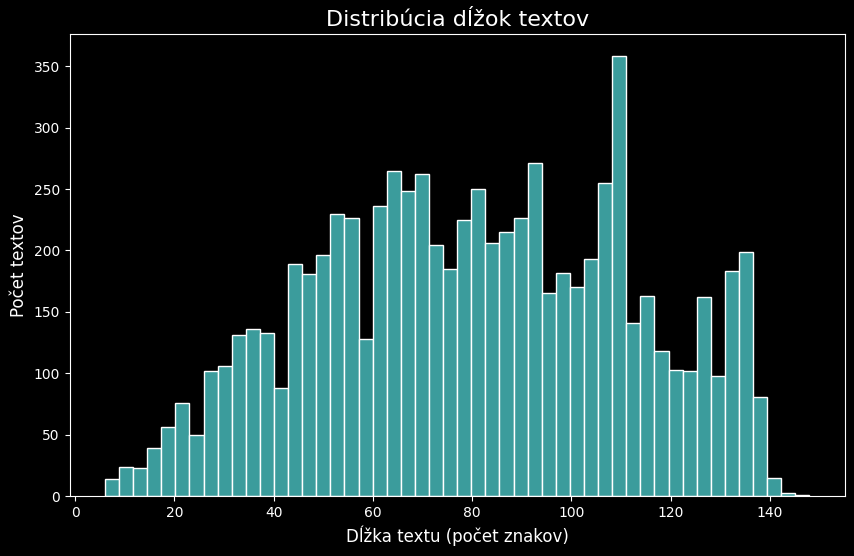

In [70]:
num_texts = len(train_data2_clean)
avg_length = train_data2_clean['cleaned_text'].apply(len).mean()

print(f"Počet textov: {num_texts}")
print(f"Priemerná dĺžka textov: {avg_length} znakov")

# Vizualizácia priemernej dĺžky textov
plt.figure(figsize=(10, 6), facecolor='black')
plt.hist(train_data2_clean['cleaned_text'].apply(len), bins=50, color='#3B9C9C', edgecolor='white')
plt.title('Distribúcia dĺžok textov', fontsize=16, color='white')
plt.xlabel('Dĺžka textu (počet znakov)', fontsize=12, color='white')
plt.ylabel('Počet textov', fontsize=12, color='white')
plt.gca().set_facecolor('black')
plt.show()

In [41]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\denis\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

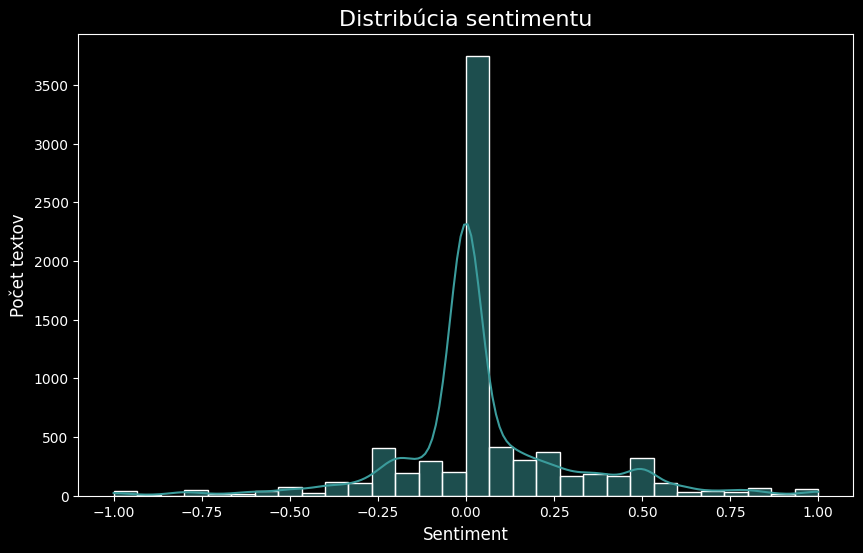

In [47]:
# Funkcia na analýzu sentimentu
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

train_data2['sentiment'] = train_data2['text'].apply(get_sentiment)

plt.figure(figsize=(10, 6), facecolor='black')
sns.histplot(train_data2['sentiment'], bins=30, color='#3B9C9C', kde=True)
plt.title('Distribúcia sentimentu', fontsize=16, color='white')
plt.xlabel('Sentiment', fontsize=12, color='white')
plt.ylabel('Počet textov', fontsize=12, color='white')
plt.gca().set_facecolor('black')
plt.show()

C:\Users\denis\AppData\Local\Temp\ipykernel_17052\1337355898.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data2_clean['sentiment'] = train_data2_clean['cleaned_text'].apply(get_sentiment)


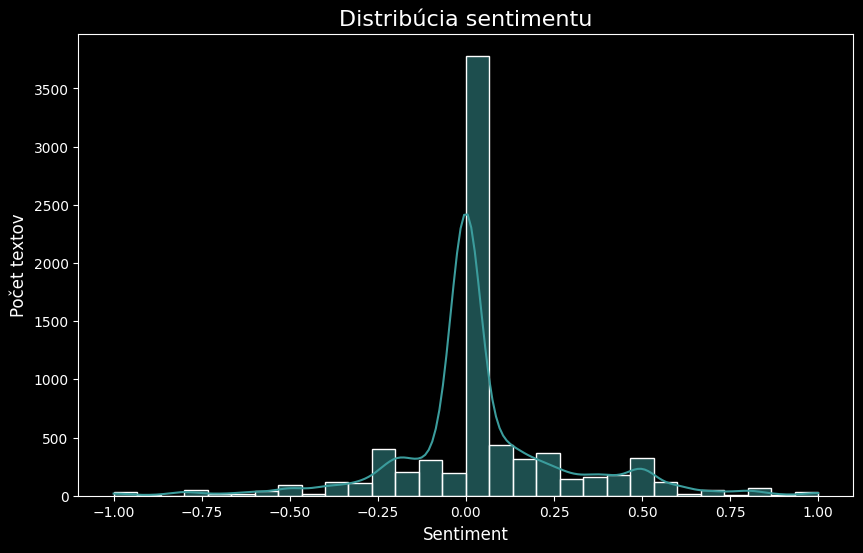

In [73]:
# Funkcia na analýzu sentimentu
from textblob import TextBlob

def get_sentiment(cleaned_text):
    analysis = TextBlob(cleaned_text)
    return analysis.sentiment.polarity

train_data2_clean['sentiment'] = train_data2_clean['cleaned_text'].apply(get_sentiment)

plt.figure(figsize=(10, 6), facecolor='black')
sns.histplot(train_data2_clean['sentiment'], bins=30, color='#3B9C9C', kde=True)
plt.title('Distribúcia sentimentu', fontsize=16, color='white')
plt.xlabel('Sentiment', fontsize=12, color='white')
plt.ylabel('Počet textov', fontsize=12, color='white')
plt.gca().set_facecolor('black')
plt.show()

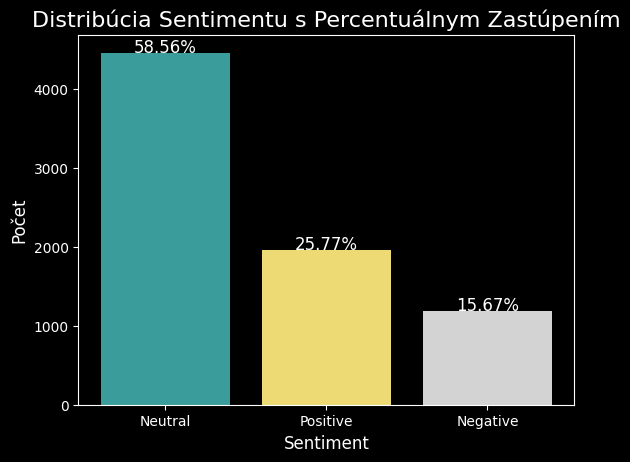

In [76]:
# Predpokladajme, že 'train_data2' je DataFrame s textovými dátami
# Vytvor funkciu na analýzu sentimentu
def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

# Aplikuj funkciu na každý text v DataFrame
train_data2['sentiment'] = train_data2['text'].apply(get_sentiment)

# Vypočítaj percentuálne zastúpenie sentimentov
sentiment_percent = (sentiment_counts / sentiment_counts.sum()) * 100

# Vytvor stĺpcový graf
bars = plt.bar(sentiment_counts.index, sentiment_counts.values, color=['#3B9C9C', '#EDDA74', '#D3D3D3'])  # Tyrkysovo modrá pre Neutral, Jemná žltá pre Positive, Svetlo šedá pre Negative

# Pridanie percentuálnych hodnôt nad stĺpcami
for bar, percent in zip(bars, sentiment_percent):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{percent:.2f}%', ha='center', fontsize=12)

plt.title('Distribúcia Sentimentu s Percentuálnym Zastúpením', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Počet', fontsize=12)
plt.xticks(rotation=0)
plt.show()

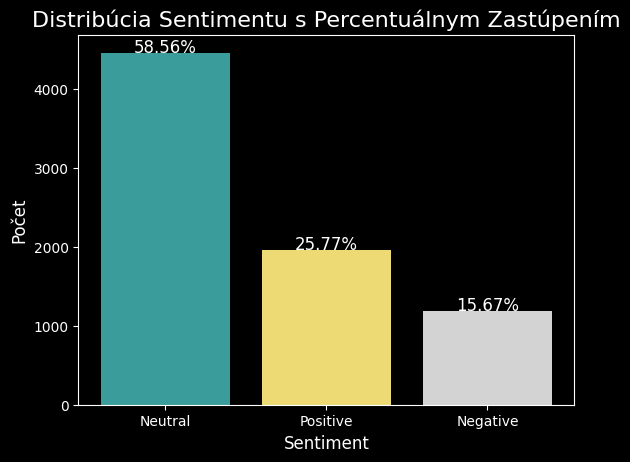

In [77]:
def get_sentiment(cleaned_text):
    blob = TextBlob(cleaned_text)
    polarity = blob.sentiment.polarity
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

# Aplikuj funkciu na každý text v DataFrame
train_data2['sentiment'] = train_data2_clean['cleaned_text'].apply(get_sentiment)

# Vypočítaj percentuálne zastúpenie sentimentov
sentiment_percent = (sentiment_counts / sentiment_counts.sum()) * 100

# Vytvor stĺpcový graf
bars = plt.bar(sentiment_counts.index, sentiment_counts.values, color=['#3B9C9C', '#EDDA74', '#D3D3D3'])  # Tyrkysovo modrá pre Neutral, Jemná žltá pre Positive, Svetlo šedá pre Negative

# Pridanie percentuálnych hodnôt nad stĺpcami
for bar, percent in zip(bars, sentiment_percent):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{percent:.2f}%', ha='center', fontsize=12)

plt.title('Distribúcia Sentimentu s Percentuálnym Zastúpením', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Počet', fontsize=12)
plt.xticks(rotation=0)
plt.show()

In [78]:
vectorizer_bigram = CountVectorizer(ngram_range=(2, 2), stop_words='english')
X_bigram = vectorizer_bigram.fit_transform(train_data2['cleaned_text'])
bigram_freq = X_bigram.sum(axis=0)
bigram_freq = [(word, bigram_freq[0, idx]) for word, idx in vectorizer_bigram.vocabulary_.items()]
bigram_freq = sorted(bigram_freq, key=lambda x: x[1], reverse=True)

# Vytvorenie trigramov
vectorizer_trigram = CountVectorizer(ngram_range=(3, 3), stop_words='english')
X_trigram = vectorizer_trigram.fit_transform(train_data2['cleaned_text'])
trigram_freq = X_trigram.sum(axis=0)
trigram_freq = [(word, trigram_freq[0, idx]) for word, idx in vectorizer_trigram.vocabulary_.items()]
trigram_freq = sorted(trigram_freq, key=lambda x: x[1], reverse=True)

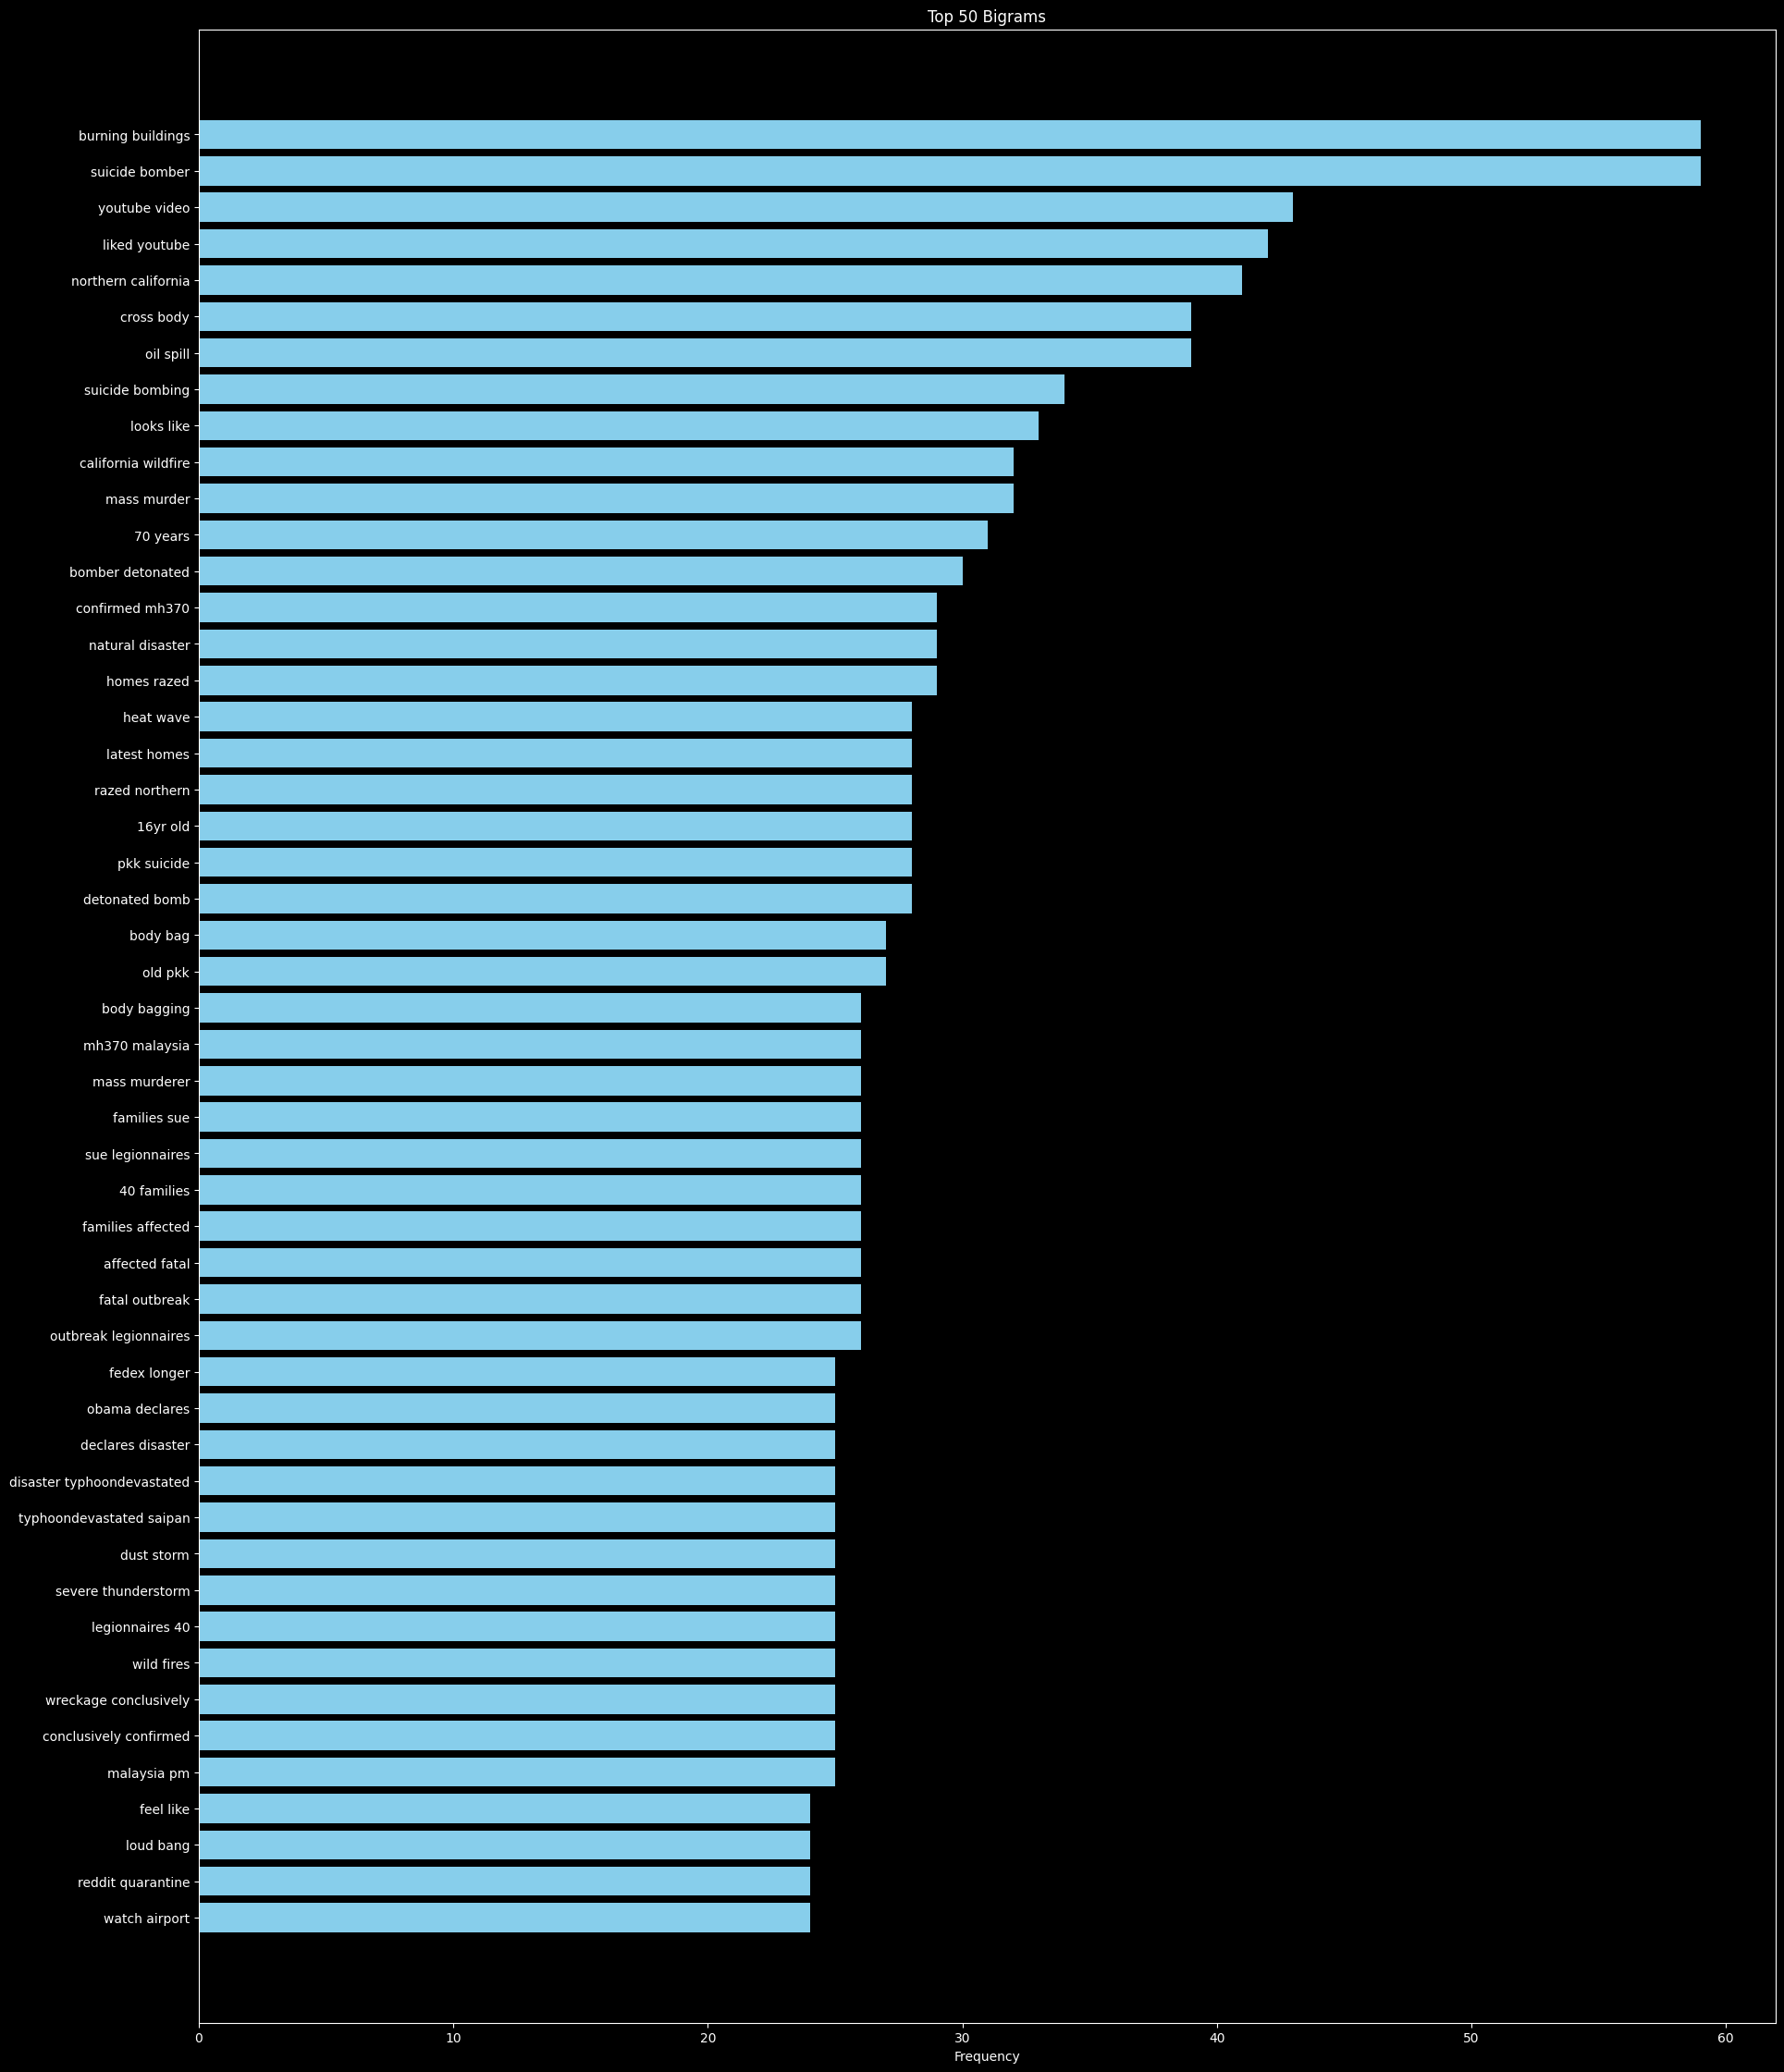

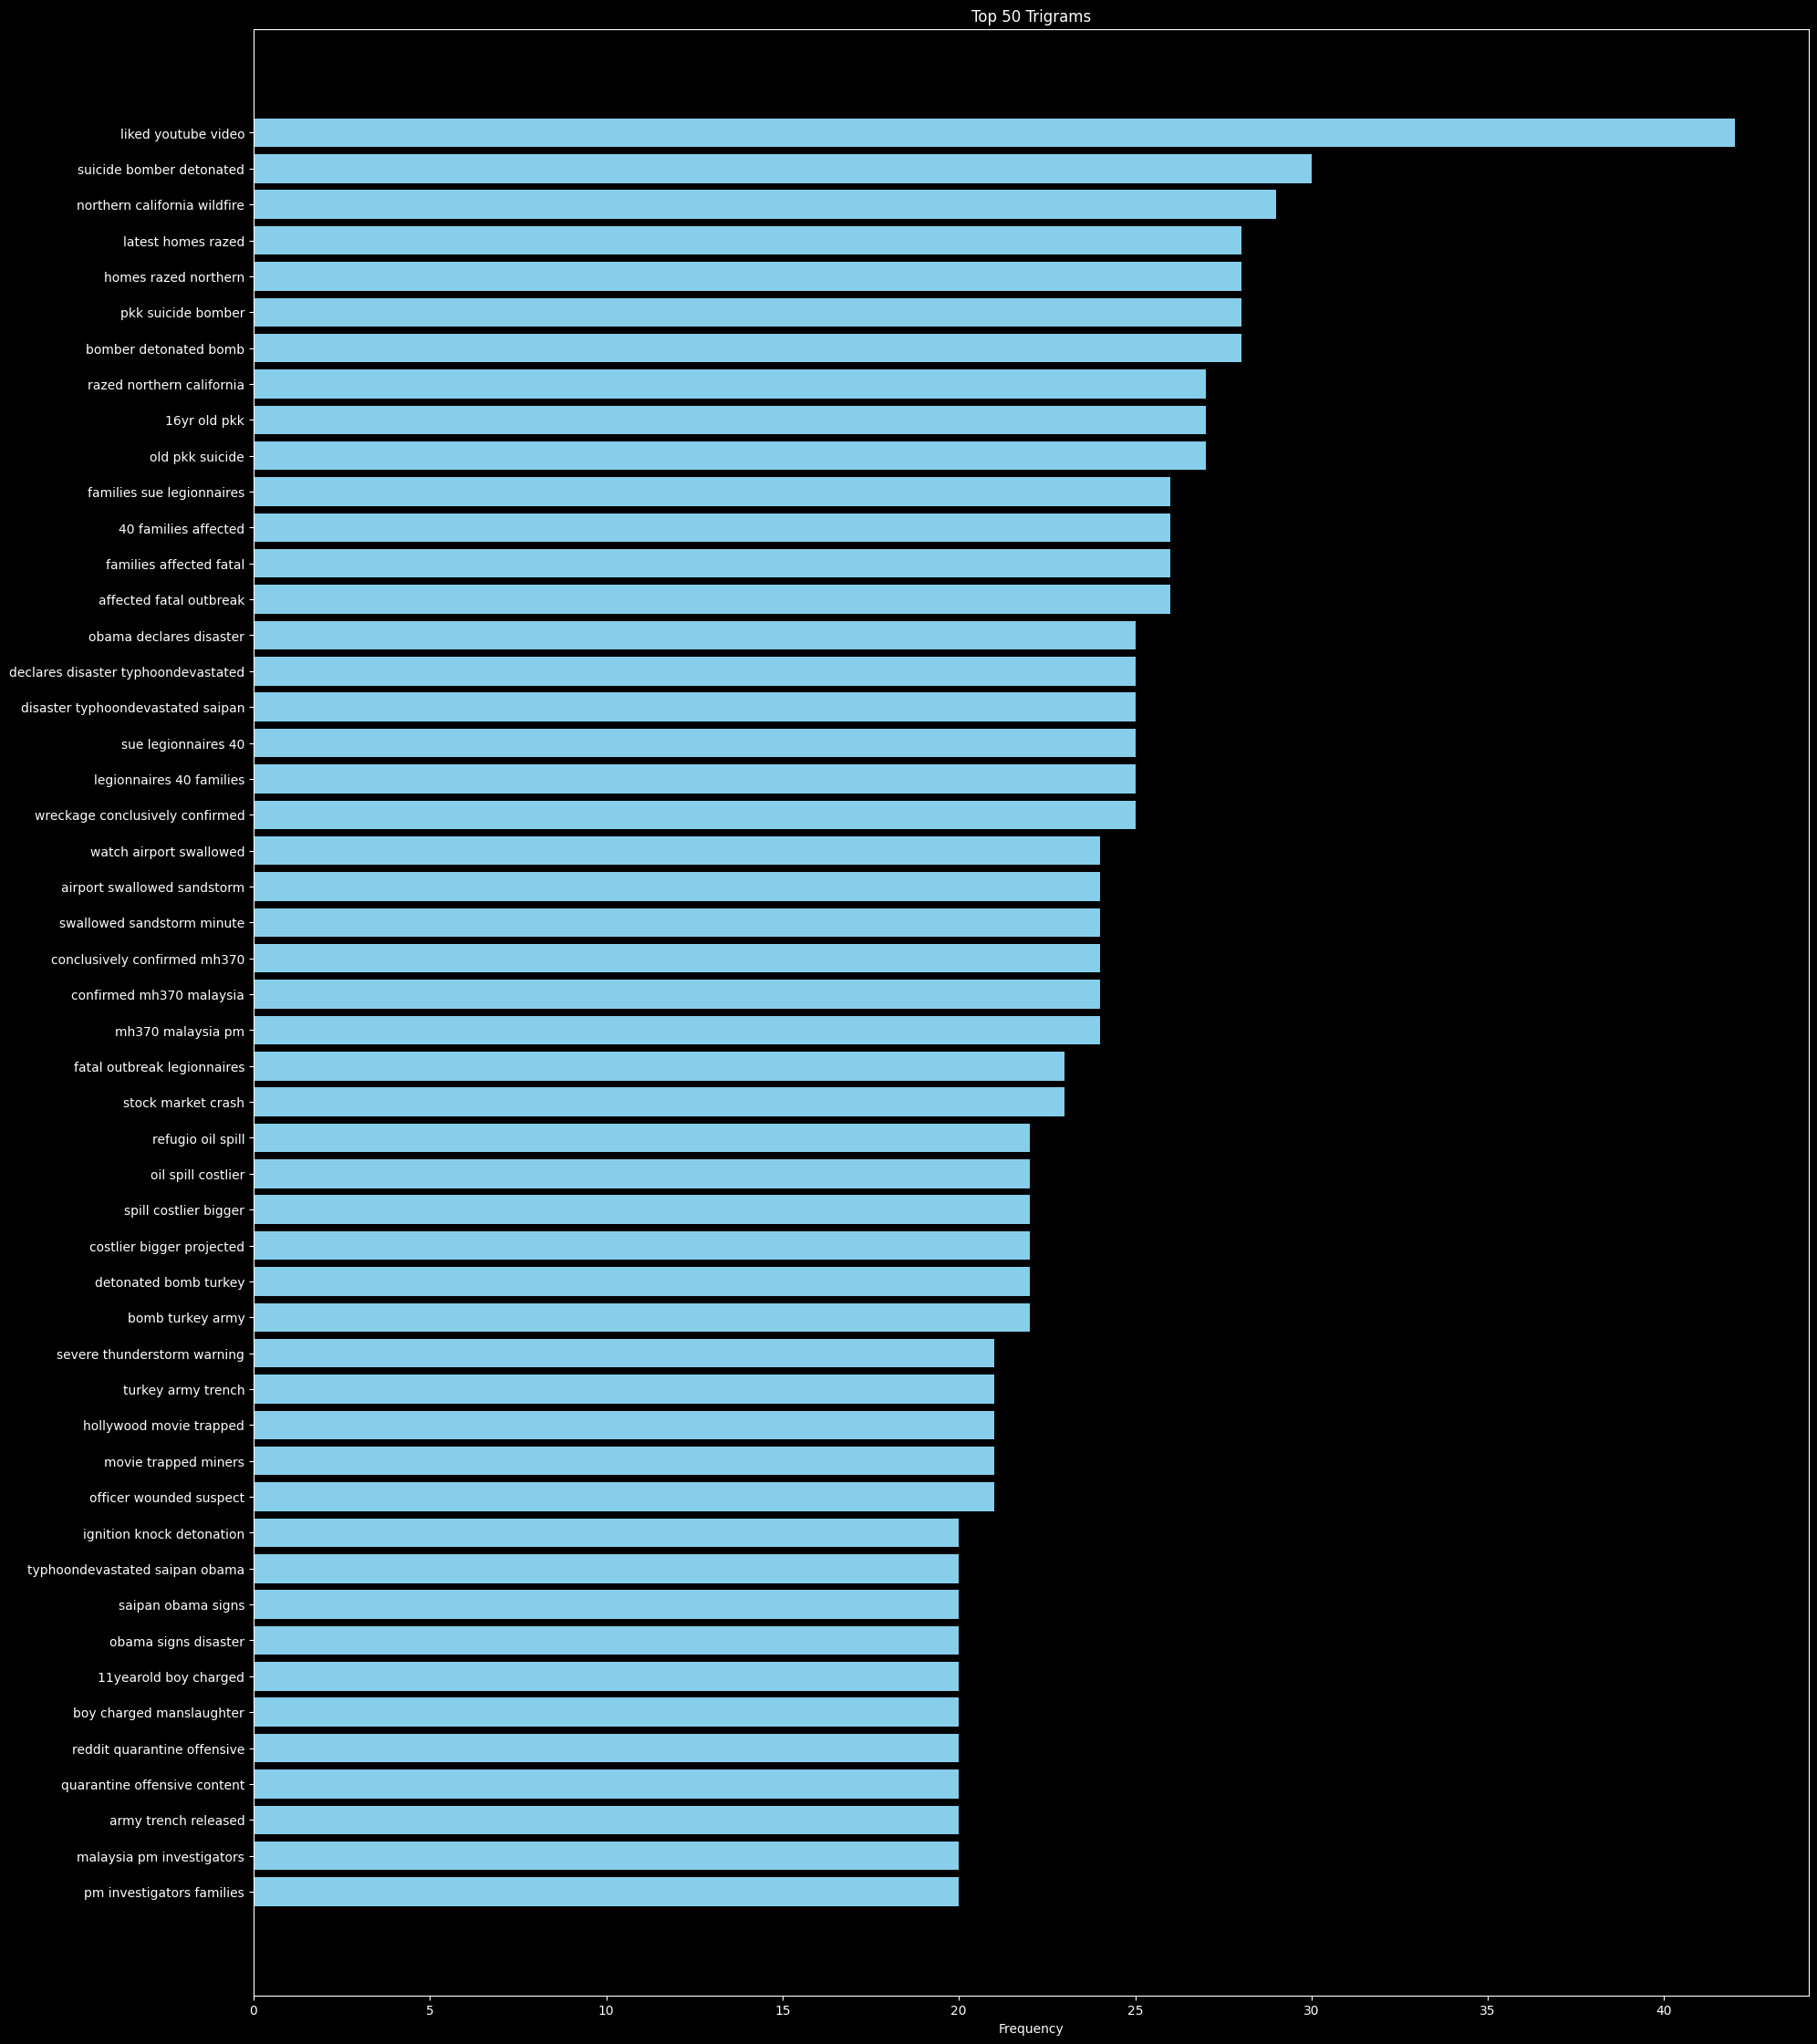

In [79]:
def plot_ngram_frequencies(ngram_freq, title, top_n=50):
    ngrams, freqs = zip(*ngram_freq[:top_n])
    plt.figure(figsize=(22, 28))
    plt.barh(ngrams, freqs, color='skyblue')
    plt.xlabel('Frequency')
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show()

# Zobrazenie najčastejších bigramov
plot_ngram_frequencies(bigram_freq, 'Top 50 Bigrams')

# Zobrazenie najčastejších trigramov
plot_ngram_frequencies(trigram_freq, 'Top 50 Trigrams')

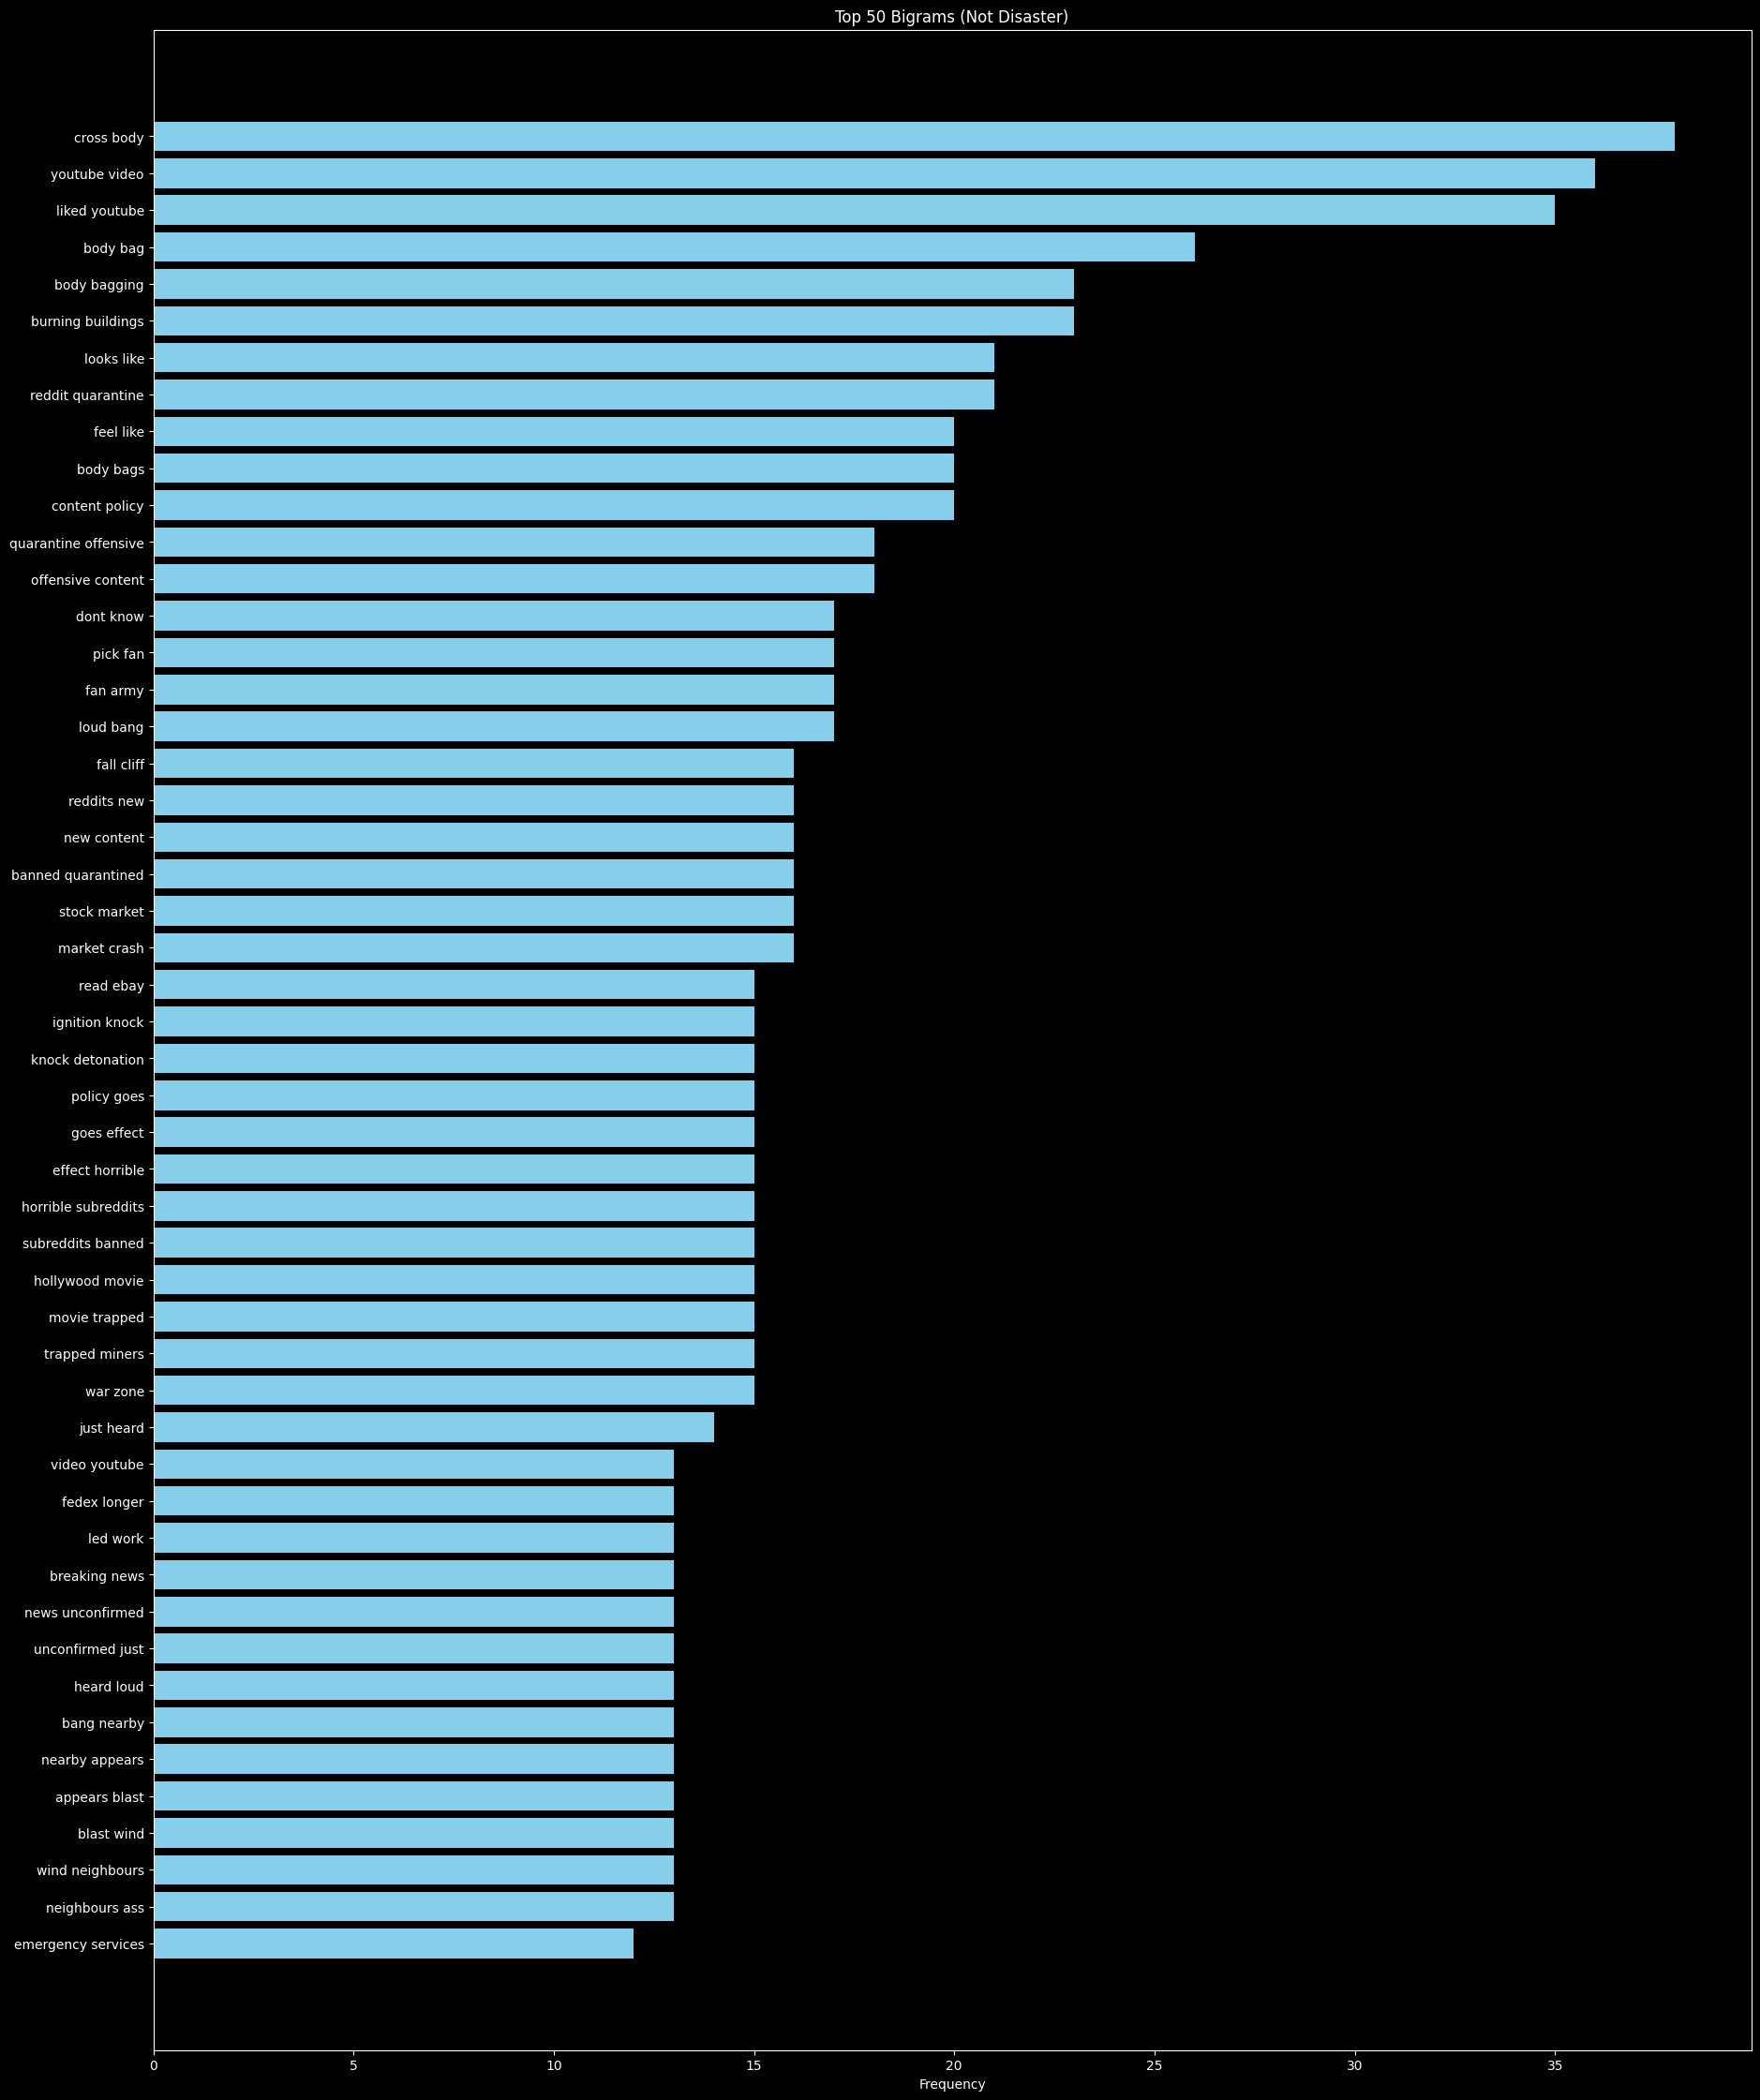

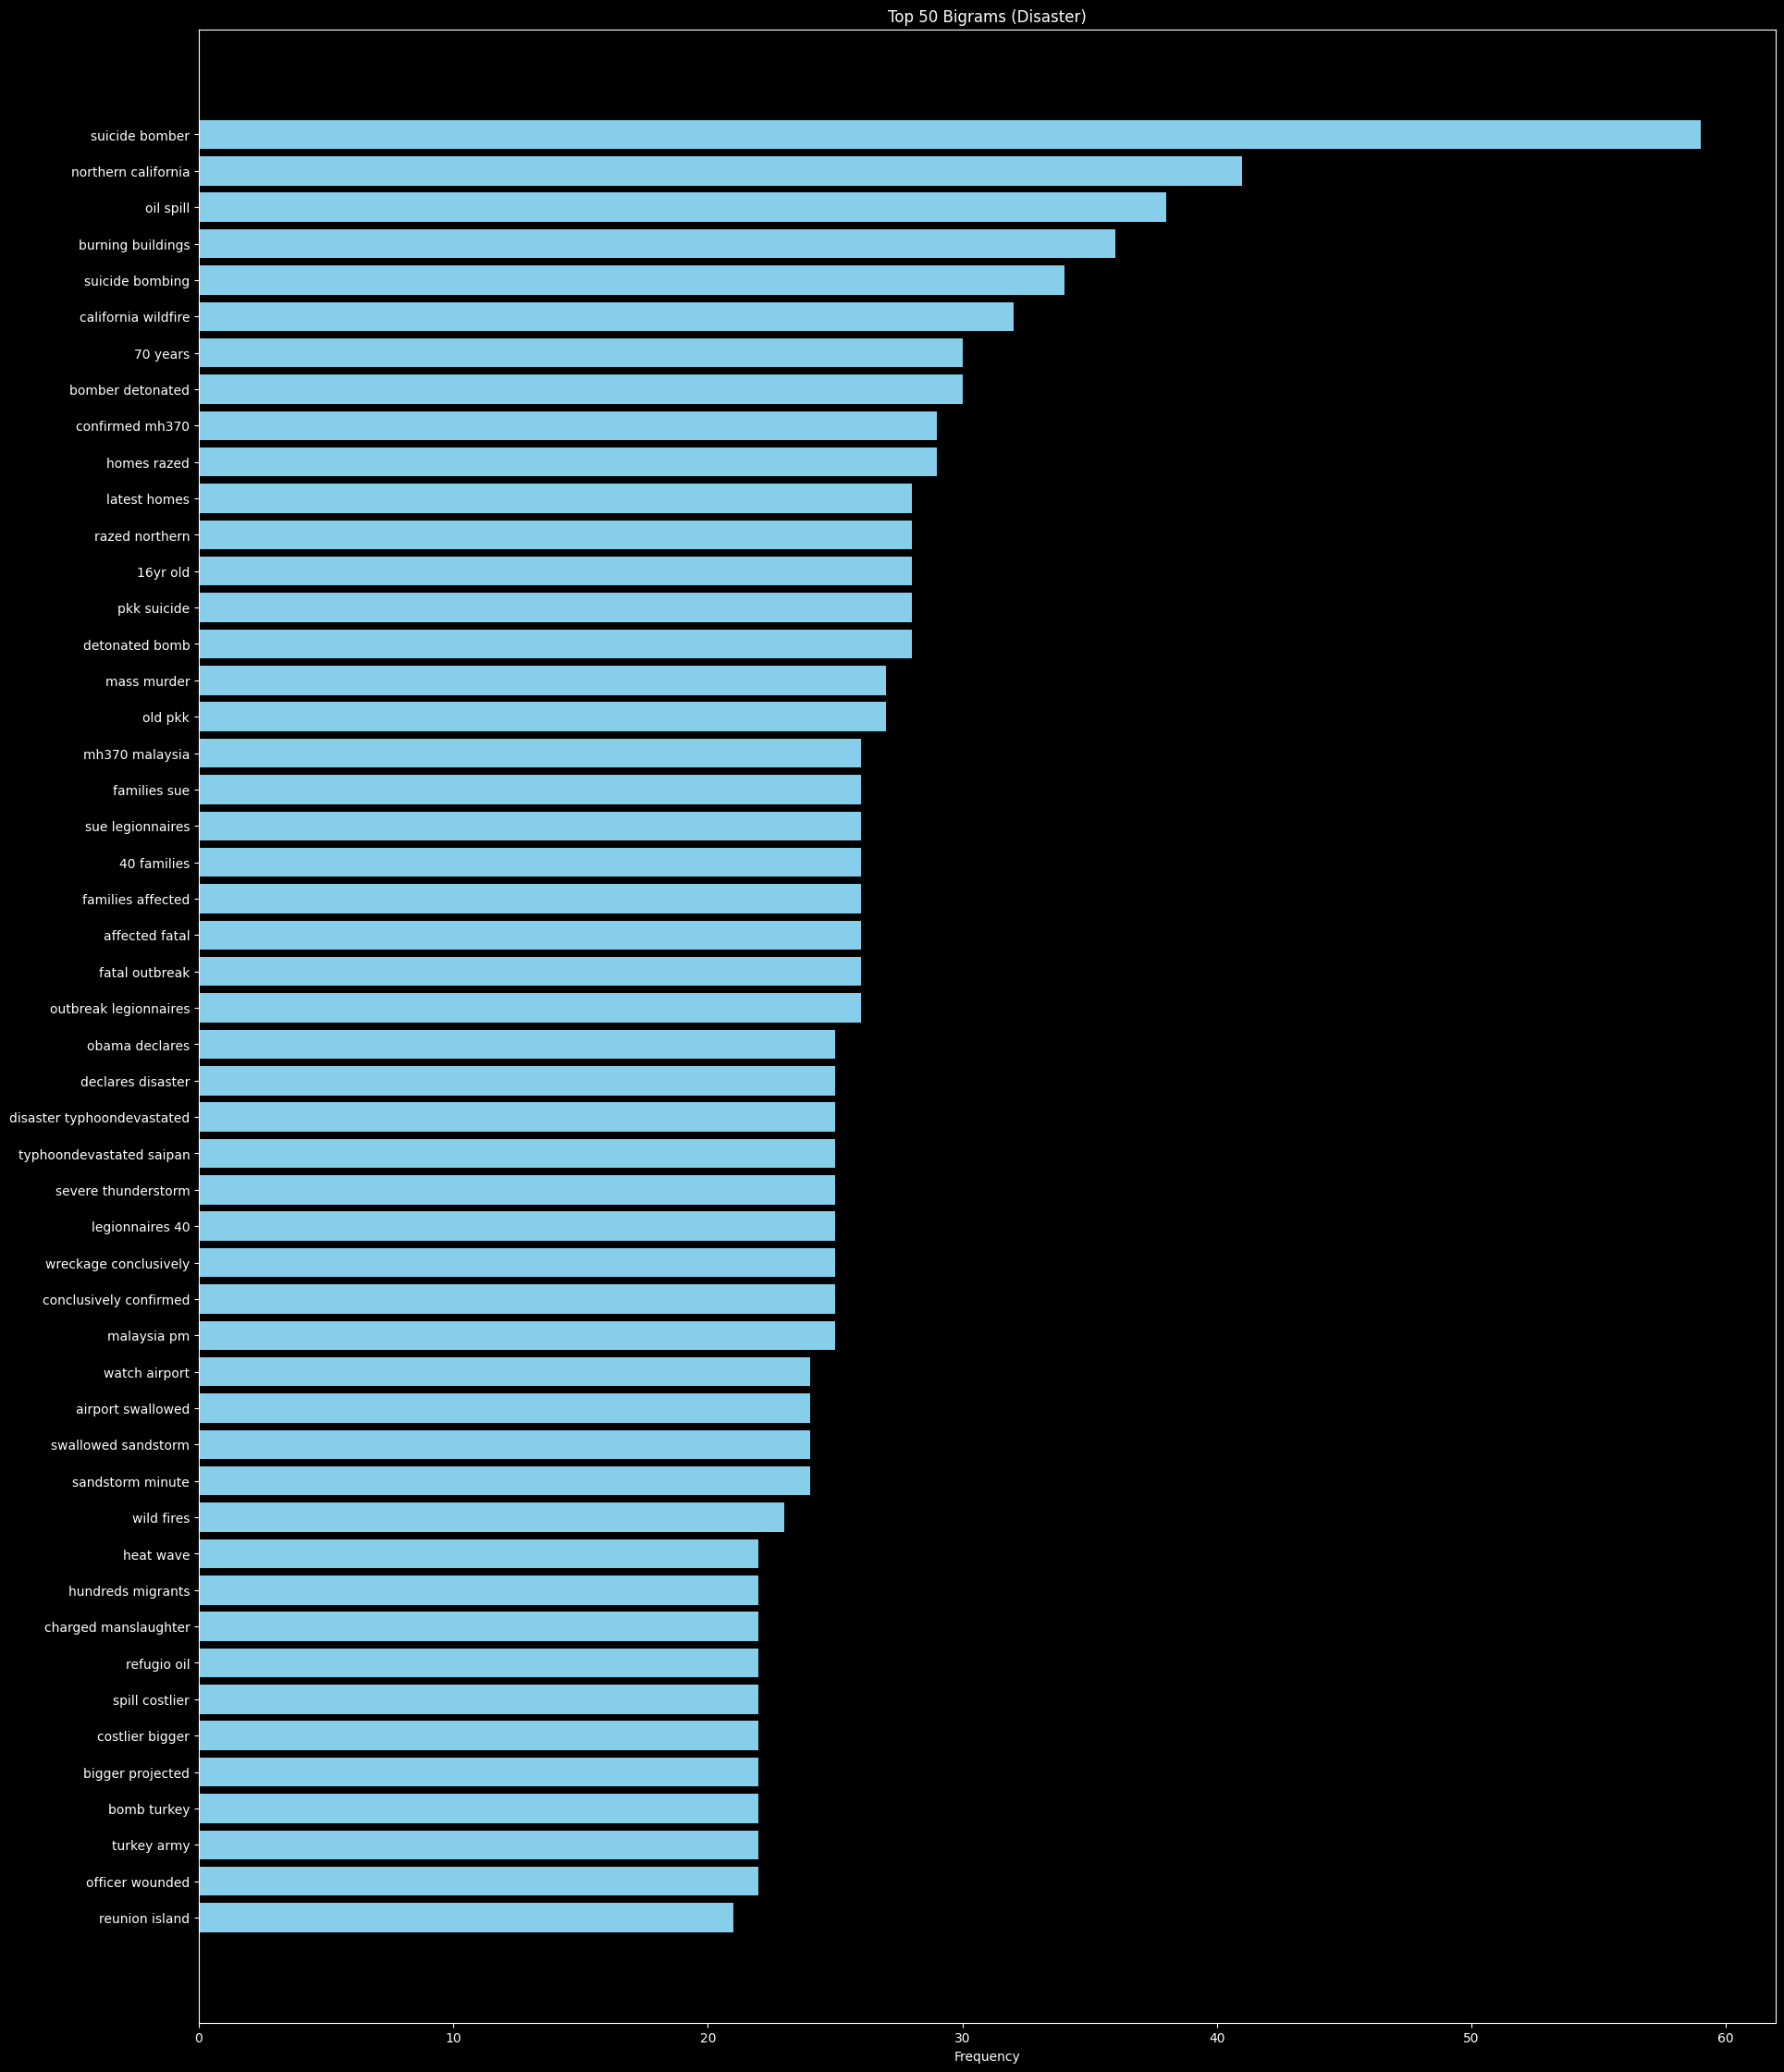

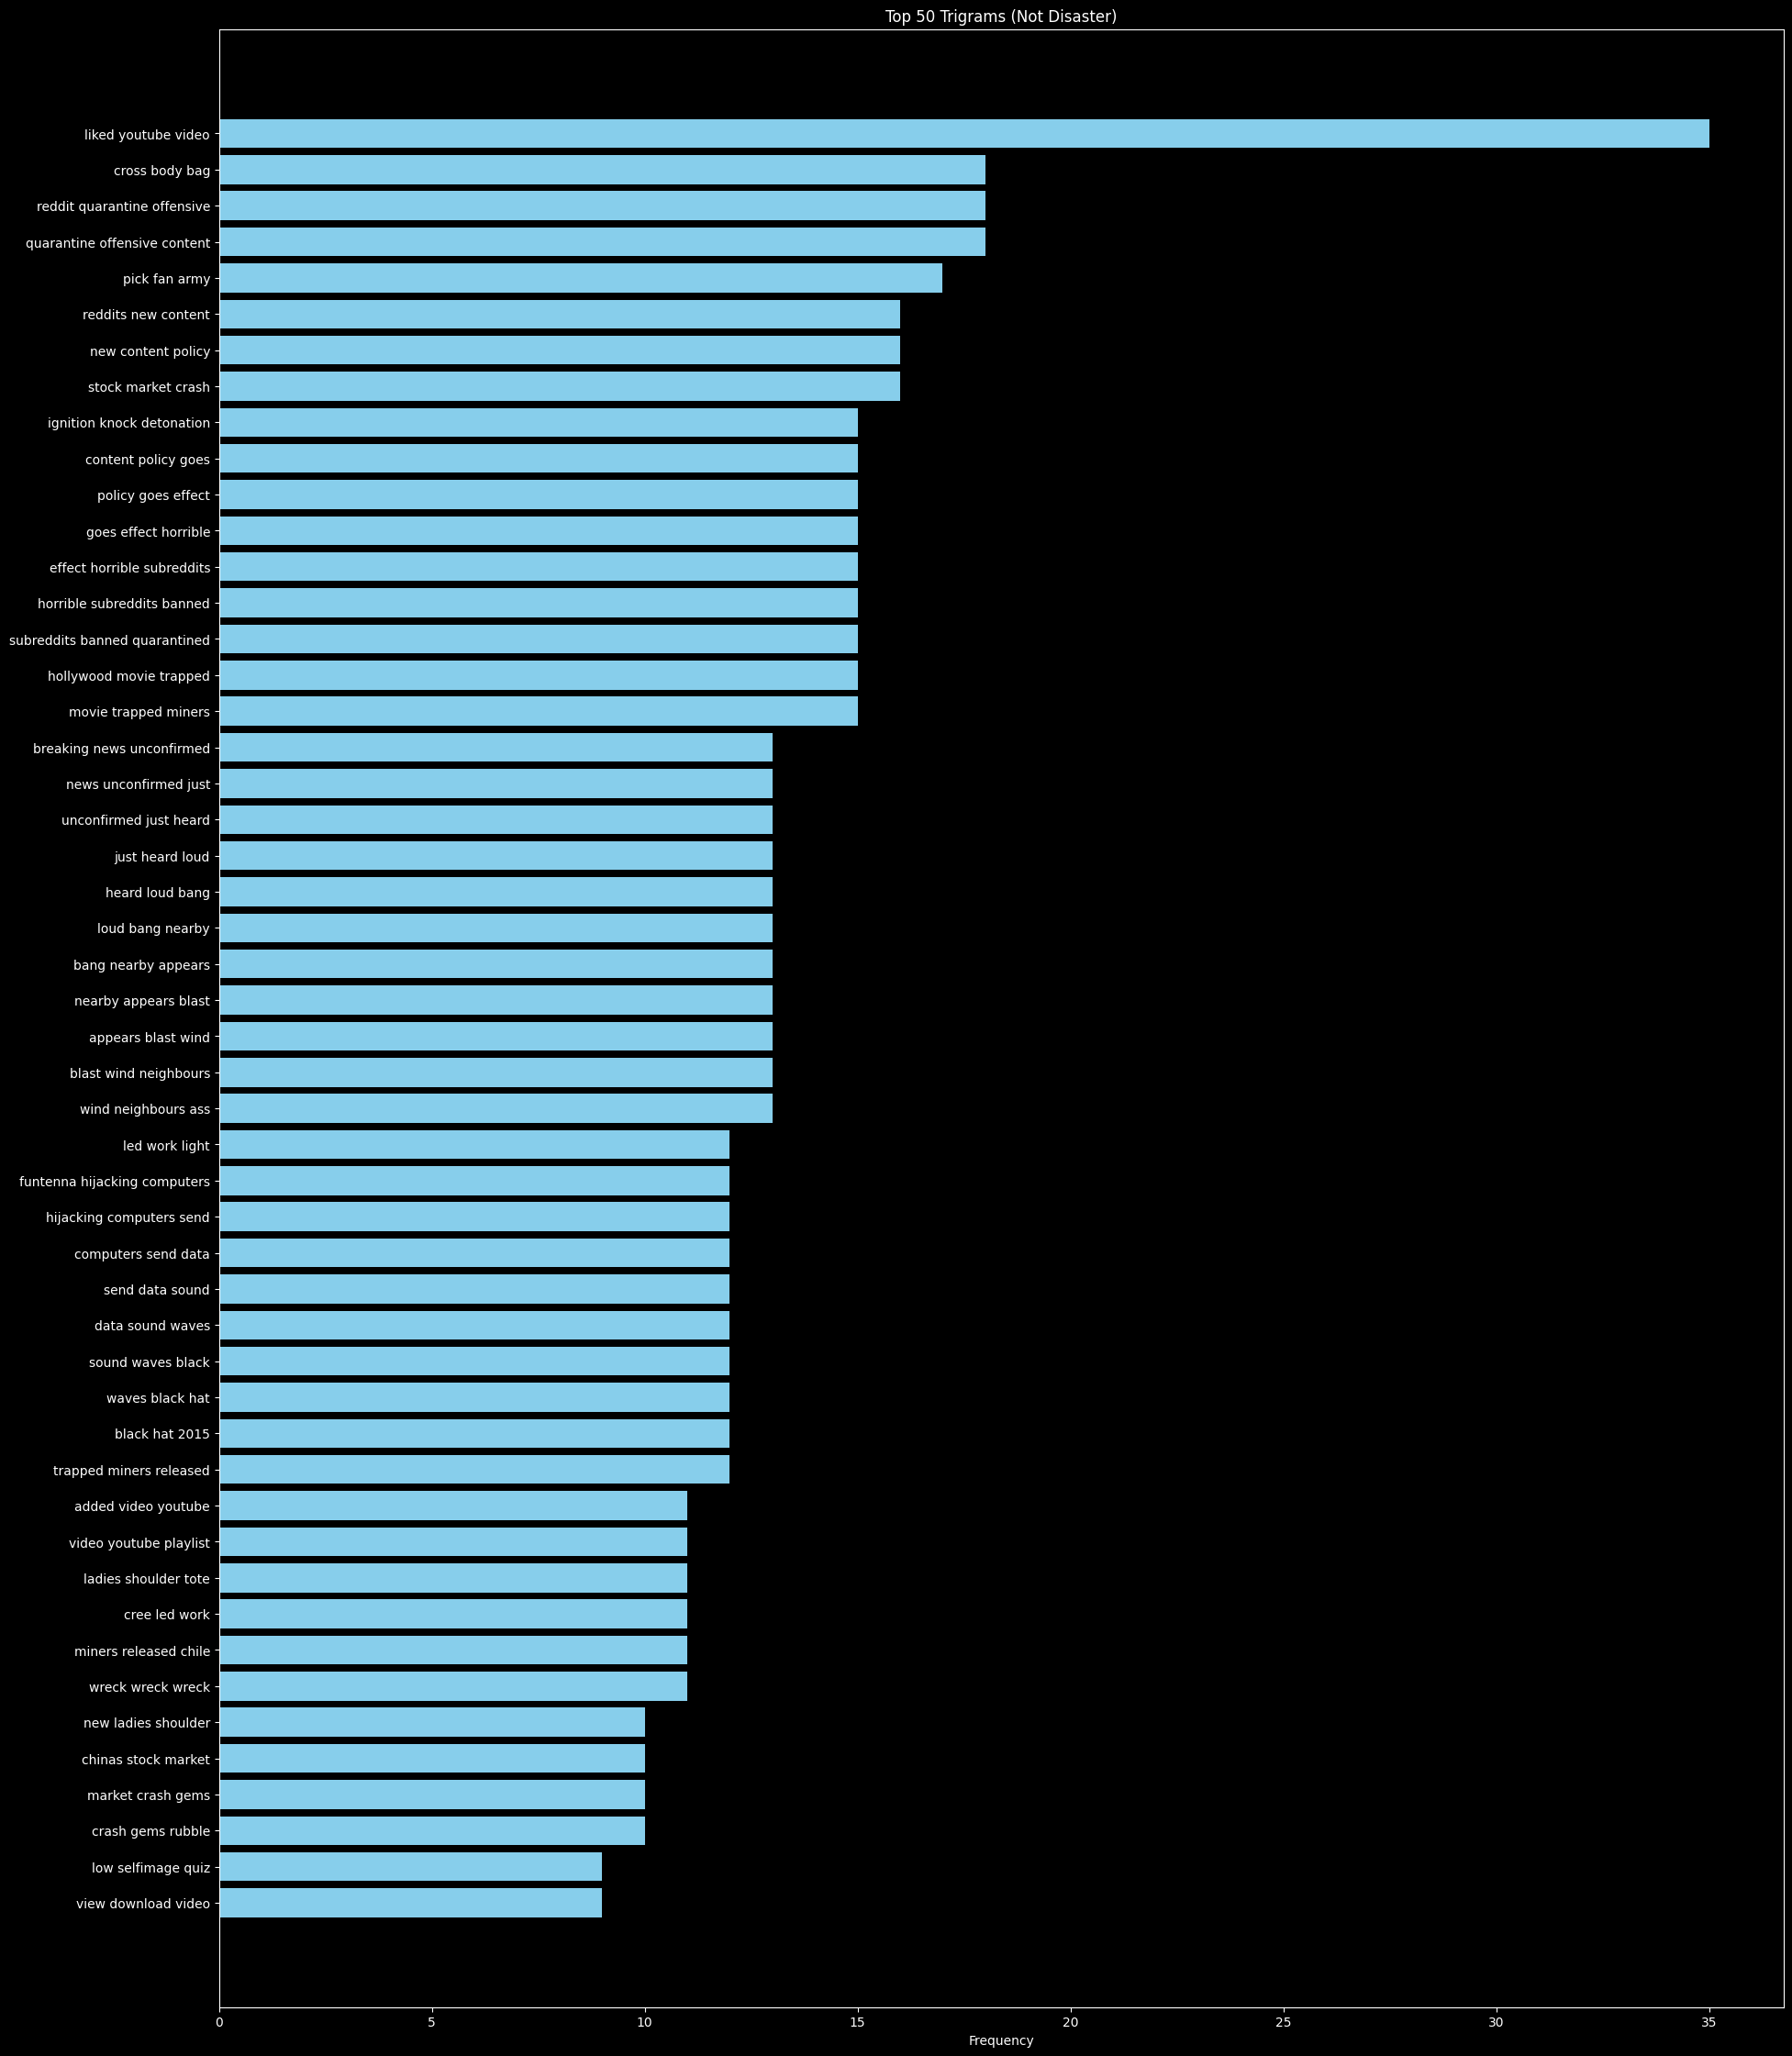

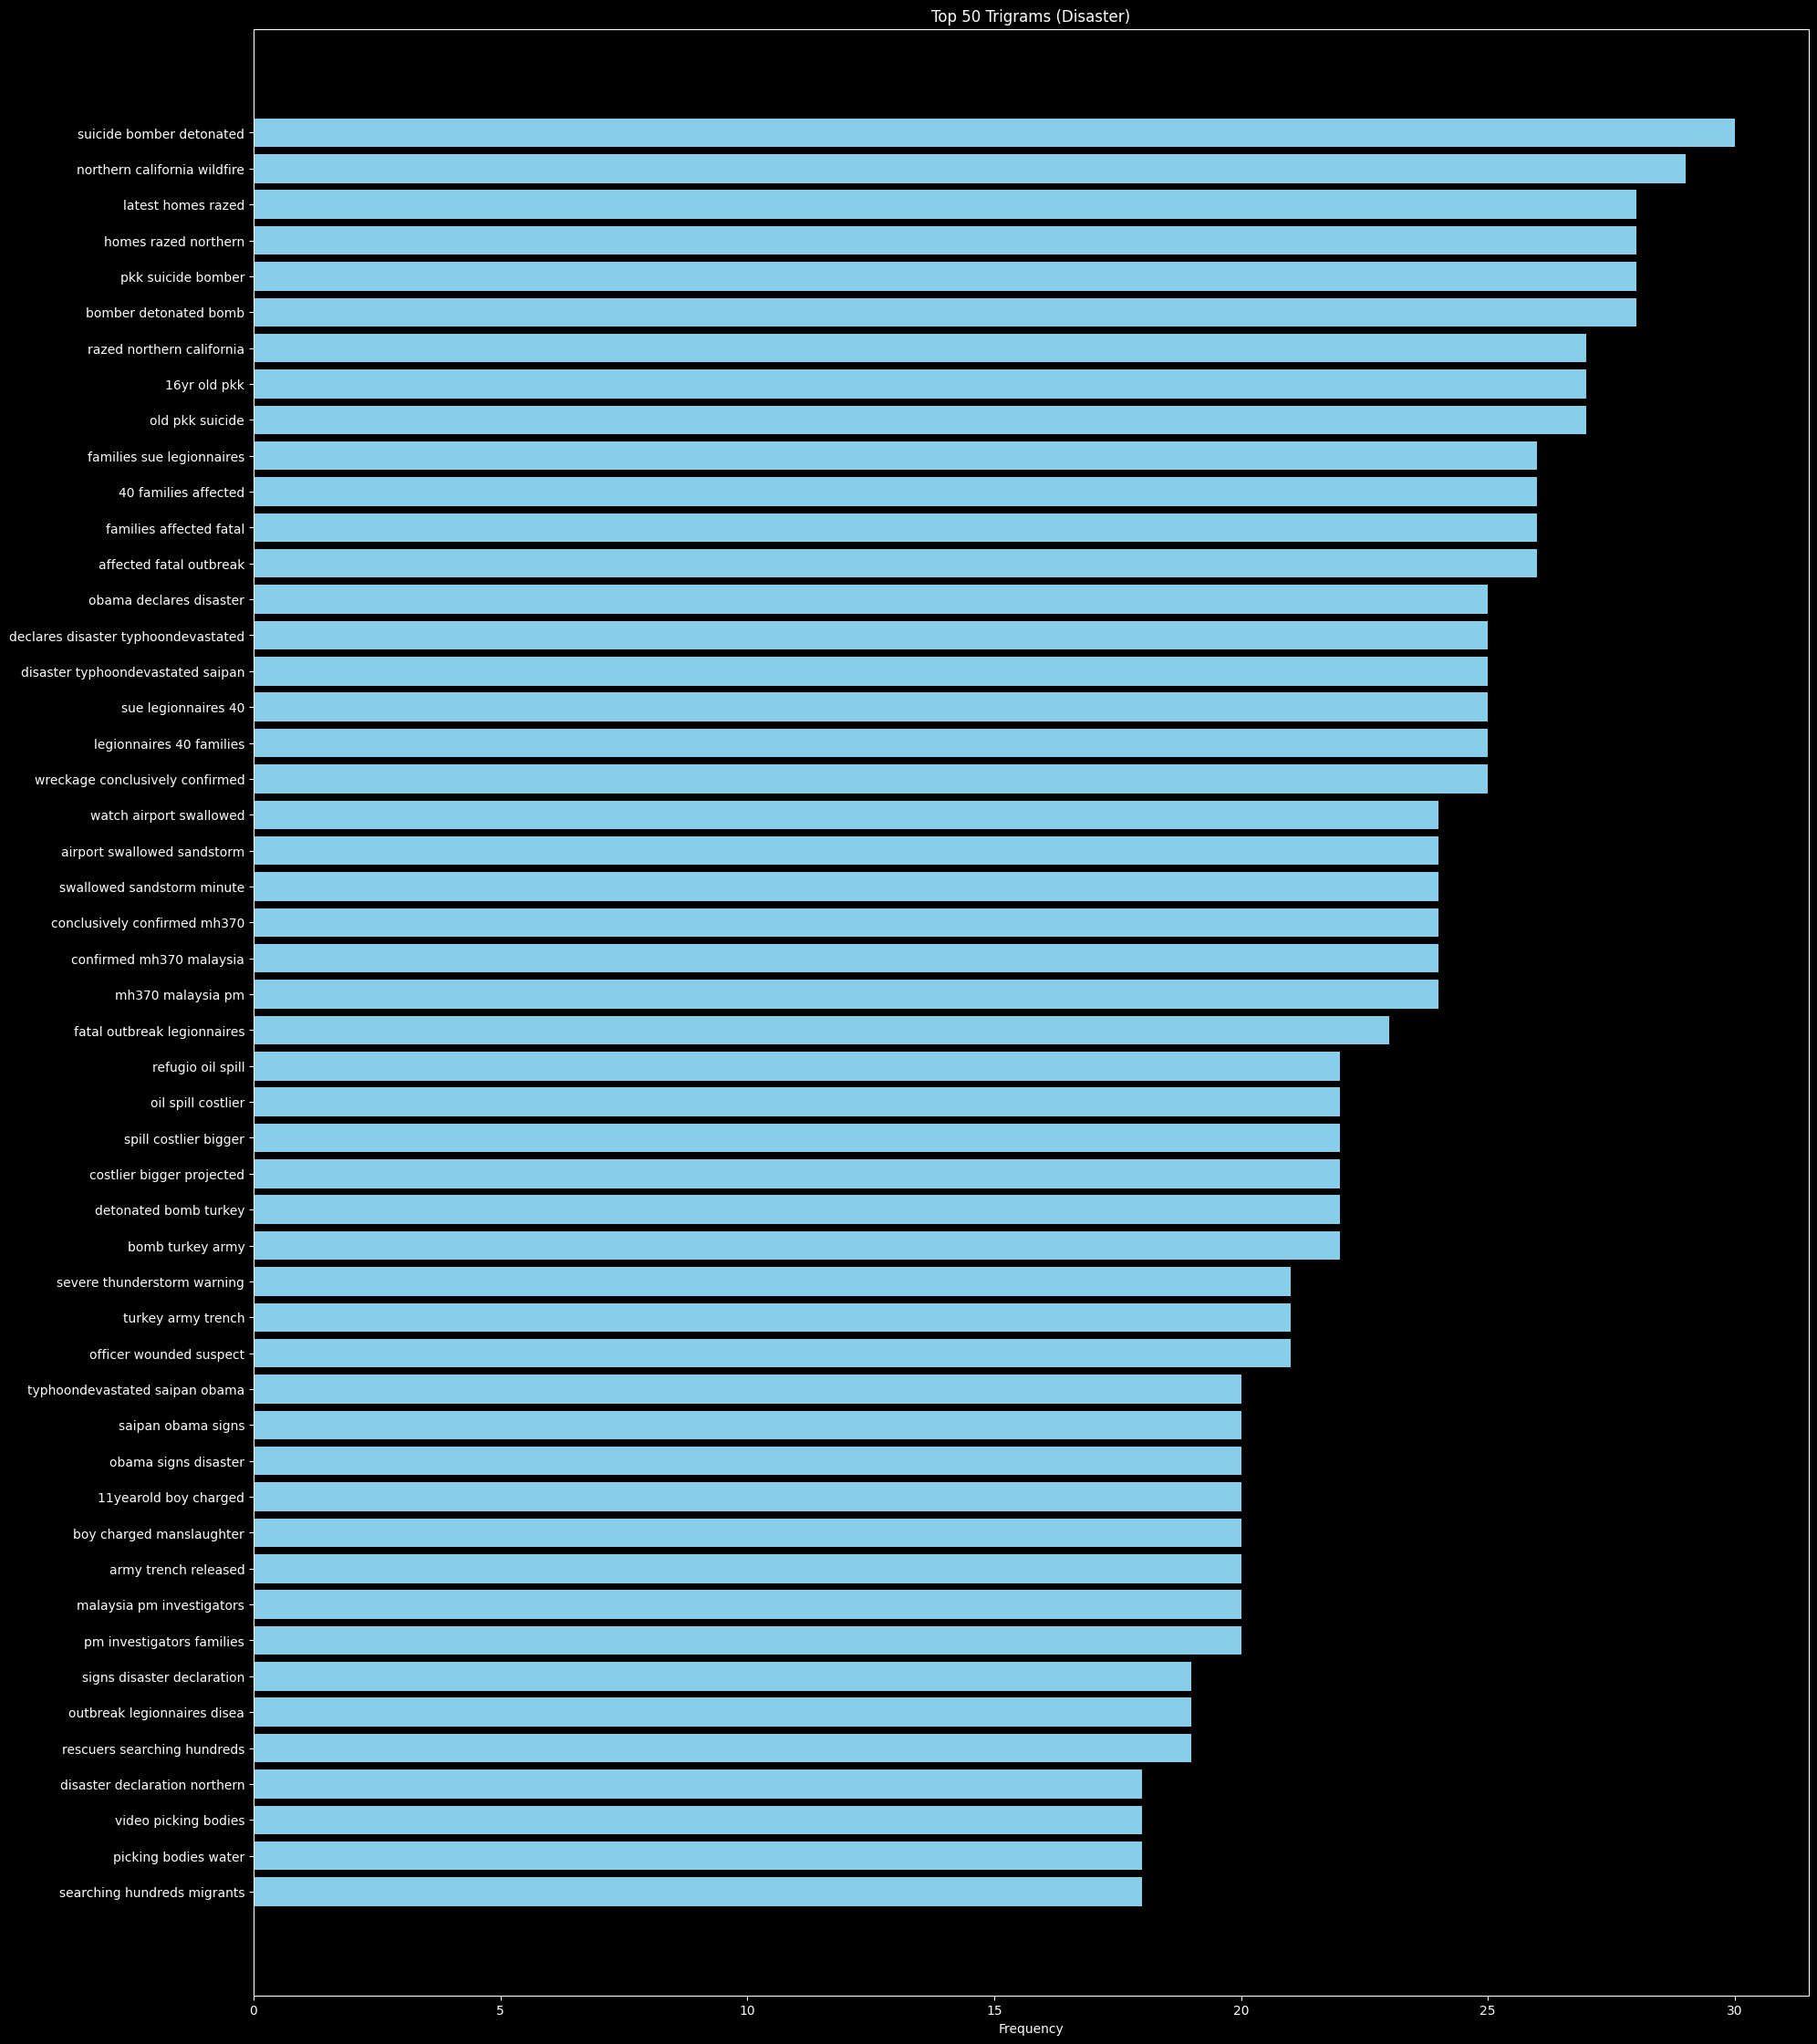

In [80]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Funkcia na vykreslenie frekvencií bigramov alebo trigramov
def plot_ngram_frequencies(ngram_freq, title, top_n=50):
    ngrams, freqs = zip(*ngram_freq[:top_n])
    plt.figure(figsize=(22, 28))
    plt.barh(ngrams, freqs, color='skyblue')
    plt.xlabel('Frequency')
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show()

# Funkcia na výpočet bigramov/trigramov pre daný text
def get_ngram_frequencies(text_series, ngram_range=(2, 2), top_n=50):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    X = vectorizer.fit_transform(text_series)
    ngram_freq = X.sum(axis=0)
    ngram_freq = [(word, ngram_freq[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    ngram_freq = sorted(ngram_freq, key=lambda x: x[1], reverse=True)
    return ngram_freq[:top_n]

# Dáta pre target=0 (not disaster)
train_data_not_disaster = train_data2[train_data2['target'] == 0]

# Dáta pre target=1 (disaster)
train_data_disaster = train_data2[train_data2['target'] == 1]

# Bigramy pre target=0 (not disaster)
bigram_freq_not_disaster = get_ngram_frequencies(train_data_not_disaster['cleaned_text'], ngram_range=(2, 2))

# Bigramy pre target=1 (disaster)
bigram_freq_disaster = get_ngram_frequencies(train_data_disaster['cleaned_text'], ngram_range=(2, 2))

# Trigramy pre target=0 (not disaster)
trigram_freq_not_disaster = get_ngram_frequencies(train_data_not_disaster['cleaned_text'], ngram_range=(3, 3))

# Trigramy pre target=1 (disaster)
trigram_freq_disaster = get_ngram_frequencies(train_data_disaster['cleaned_text'], ngram_range=(3, 3))

# Vizualizácia najčastejších bigramov pre target=0 (not disaster)
plot_ngram_frequencies(bigram_freq_not_disaster, 'Top 50 Bigrams (Not Disaster)')

# Vizualizácia najčastejších bigramov pre target=1 (disaster)
plot_ngram_frequencies(bigram_freq_disaster, 'Top 50 Bigrams (Disaster)')

# Vizualizácia najčastejších trigramov pre target=0 (not disaster)
plot_ngram_frequencies(trigram_freq_not_disaster, 'Top 50 Trigrams (Not Disaster)')

# Vizualizácia najčastejších trigramov pre target=1 (disaster)
plot_ngram_frequencies(trigram_freq_disaster, 'Top 50 Trigrams (Disaster)')